<a href="https://colab.research.google.com/github/devhyunjun/TIL/blob/master/regression_deeplearning_230518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymysql
import pandas as pd
import numpy as np
db= pymysql.connect(
    host="ec2-15-152-249-56.ap-northeast-3.compute.amazonaws.com", user="mt-1", password="1111", db="zigbang_project", charset="utf8")
# cursor = conn.cursor()
df = pd.read_sql("SELECT * FROM zb_final;", db, index_col='id')

# result = cursor.fetchall()
# for record in result:
#     print(record)
db.close()

<ipython-input-2-a846c6db1aaf>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM zb_final;", db, index_col='id')


In [ ]:
df.columns

Index(['service_type', 'address1', 'address2', '_floor', 'size_m2',
       'sales_type', 'rent', 'deposit', 'manage_cost', 'manage_cost_inc',
       'manage_cost_count', 'elevator', 'room_direction_text', 'images',
       'parking', 'near_subways', 'near_subways_count', 'options',
       'options_count', 'description', 'title', 'add1', 'add2', 'add3',
       'supermarket_dist', 'convenience_store_dist', 'school_dist',
       'subway_dist', 'cultural_venue_dist', 'public_institution_dist',
       'hospital_dist', 'x_w84', 'y_w84', 'sgg_cd', 'emd_cd_2022',
       'emd_cd_2020', 'sido_nm', 'sgg_nm', 'emd_nm', 'building_total',
       'building_dandok_p', 'building_apt_p', 'building_yeonlip_p',
       'building_dasedae_p', 'building_nonresidential_p', 'building_others_p',
       'ppltn_total', 'gender_ratio', 'ppltn_foreign_domestic_ratio',
       'ppltn_upper_65_p', 'aging', 'aged', 'post_aged', 'ppltn_dnsty',
       'corp_to_pop', 'ppltn_adult_p', 'hhd_member_avg', 'hhd_total',
       'h

## feature engineering 

In [ ]:
# # 결측치
# df=df.dropna(axis=0)

In [ ]:
df['deposit+rent'] = df['deposit']*0.07/12 + df['rent']
df.head(3)

,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,manage_cost_inc,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,deposit+rent
id,,,,,,,,,,,,,,,,,,,,,
36293764,원룸,경기도 동두천시 생연동,225-16,3,24.79,월세,28,300,7.0,"가스, 수도, 인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,29.750000
36576214,원룸,경기도 동두천시 생연동,678-90,5,16.53,월세,30,300,5.0,"인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,31.750000
36533474,원룸,경기도 동두천시 생연동,678-56,6,43.87,월세,50,500,5.0,"인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,52.916667


In [ ]:
# 방향 점수 구하기 
def get_room_direction_score(row):
    if row['room_direction_text'] == '남향':
        return 3
    elif row['room_direction_text'] in ['남동향', '남서향']:
        return 2
    elif row['room_direction_text'] in ['동향', '서향']:
        return 1
    else:
        return 0

# apply the function to each row of the DataFrame to create a new column named 'room_direction_score'
df['room_direction_score'] = df.apply(get_room_direction_score, axis=1)

In [ ]:
# 옵션 갯수, 지하철 수 숫자로 변환
df['manage_cost_inc_num'] = df['manage_cost_inc'].str.split(',').apply(len)
df['near_subways_num'] = df['near_subways'].str.split(',').apply(len)
df['options_num'] = df['options'].str.split(',').apply(len)

In [ ]:
# 매물 변수 drop
df.drop('manage_cost_inc', axis=1, inplace=True)
df.drop('near_subways', axis=1, inplace=True)
df.drop('options', axis=1, inplace=True)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
import seaborn as sns
from datetime import datetime

In [ ]:
# 읍면동 주거유형 갯수에서 비율로
df['tenure_self_ratio'] = df['tenure_self'] / df['tenure_total']
df['tenure_jeonse_ratio'] = df['tenure_jeonse'] / df['tenure_total']
df['tenure_free_ratio'] = df['tenure_free'] / df['tenure_total']
df['tenure_monthly_ratio'] = df['tenure_monthly'] / df['tenure_total']

# 주거유형 갯수 drop
df.drop(['tenure_self', 'tenure_jeonse', 'tenure_free', 'tenure_monthly'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['service_type', 'address1', 'address2', '_floor', 'size_m2',
       'sales_type', 'rent', 'deposit', 'manage_cost', 'manage_cost_count',
       'elevator', 'room_direction_text', 'images', 'parking',
       'near_subways_count', 'options_count', 'description', 'title', 'add1',
       'add2', 'add3', 'supermarket_dist', 'convenience_store_dist',
       'school_dist', 'subway_dist', 'cultural_venue_dist',
       'public_institution_dist', 'hospital_dist', 'x_w84', 'y_w84', 'sgg_cd',
       'emd_cd_2022', 'emd_cd_2020', 'sido_nm', 'sgg_nm', 'emd_nm',
       'building_total', 'building_dandok_p', 'building_apt_p',
       'building_yeonlip_p', 'building_dasedae_p', 'building_nonresidential_p',
       'building_others_p', 'ppltn_total', 'gender_ratio',
       'ppltn_foreign_domestic_ratio', 'ppltn_upper_65_p', 'aging', 'aged',
       'post_aged', 'ppltn_dnsty', 'corp_to_pop', 'ppltn_adult_p',
       'hhd_member_avg', 'hhd_total', 'hhd_collective_p', 'hhd_private_p',
       'hhd_family

In [ ]:
def get_floor_score(row):
    if row['_floor'] == 1:
        return 0
    elif row['_floor']==2:
        return 1
    else:
        return 2
df['room_floor_score'] = df.apply(get_floor_score, axis=1)

In [ ]:
# 문자열, 코드 등 회귀변수 안쓰는 변수 drop
drop_columns = ['address1', 'address2', '_floor' , 'room_direction_text', 'images', '_floor', 'room_direction_text',
        'description', 'title', 'add1', 'add2', 'add3', 'sgg_cd',
        'emd_cd_2022',
        'emd_cd_2020',
        'sido_nm',
        'sgg_nm',
        'emd_nm', 
        'building_total',
        'hhd_total']

# 카테고리(원핫?) : sales_type

# 시군구 컬럼들 'tenure_total', 'app_dasedae','ssg_ppltn',
#        'app_dandok', 'app_nonresidential', 'app_apt', 'app_yeonlip',
#        'app_officetel', 'park_per_area', 'green_per_area', 'dust_level',
#        'ssg_ppltn', 'convenience_per_ppltn', 'shopping_per_ppltn',
#        'grocery_per_ppltn', 'restaurant_per_ppltn', 'medical_per_ppltn',
#        'culture_per_ppltn', 'gym_per_ppltn', 'ppltn_net_migration_rate',
#        'safety_idx',

# 읍면동 총인구 'ppltn_total'

In [ ]:
# 안쓰는 변수 drop 된 df 정의
df =  df.drop(drop_columns, axis=1, inplace=False)

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(len(num_col))

69


In [ ]:
# 관리비 100 이상 말이 안됨 -> 원세랑 비교
df[df['manage_cost']>100]
df=df.drop(df[df['manage_cost']>100].index)


df[df['rent']>1000]
df=df.drop(df[df['rent']>1000].index)

df[df['size_m2']>150]
df=df.drop(df[df['size_m2']>150].index)
# print(df['size'].quantile(q=0.999))

df[(df['service_type']=='원룸')&(df['size_m2']>120)] # 120 -> 40평
df=df.drop(df[(df['service_type']=='원룸')&(df['size_m2']>120)].index)
# df[(df['service_type']=='원룸')&(df['size']>40)]


df[(df['service_type']=='원룸')&(df['size_m2']>99)]
df=df.drop(df[(df['service_type']=='원룸')&(df['size_m2']>99)].index)
# df[(df['service_type']=='원룸')&(df['size']>30)]

df[df['manage_cost']>50]
df=df.drop(df[(df['service_type']=='원룸')&(df['manage_cost']>50)].index)
# df[(df['service_type']=='원룸')&(df['manage_cost']>50)]
# df[df['size']>50]


In [ ]:
# df['green_per_area'].quantile(q=0.999))
# df[(df['green_per_area']>13.111)]

In [ ]:
# # 이상치
# # boxplot으로 이상치 확인
# fig, axes = plt.subplots(len(num_col),1, figsize = (8, 85))
# row=0
# for i in num_col:
#     sns.boxplot(data = df, x = i, ax = axes[row])
#     row+=1
# plt.tight_layout()
# plt.show()

# 상관계수 파악

In [ ]:
# find correlation with pandas ".corr()"
cor = df.corr() # 상관계수

# # visualize with Seaborn heat map, color map = Blues
# sns.heatmap(cor, annot = False, cmap = plt.cm.Reds)
# plt.show()


# get correlation values with target variable
cor_target = abs(cor['deposit+rent'])
print(cor_target)


# choose features above threshold 0.6
selected_cols = cor_target[cor_target > 0.6]

<ipython-input-19-60ad321e1163>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr() # 상관계수


size_m2                 0.491278
rent                    0.966909
deposit                 0.253098
manage_cost             0.254389
manage_cost_count       0.366267
                          ...   
tenure_self_ratio       0.369795
tenure_jeonse_ratio     0.416835
tenure_free_ratio       0.109087
tenure_monthly_ratio    0.209883
room_floor_score        0.161766
Name: deposit+rent, Length: 69, dtype: float64


In [ ]:
selected_cols

rent            0.966909
deposit+rent    1.000000
Name: deposit+rent, dtype: float64

In [ ]:
# rent 변수제거
df.drop(['rent'], axis=1, inplace=True)

In [ ]:
df['deposit']

id
36293764     300
36576214     300
36533474     500
36485939    3000
36485528     500
            ... 
36557272    1000
36492163    2000
36504430     500
36544670    1000
36386612    3000
Name: deposit, Length: 34208, dtype: int64

# 다중공선성 제거 - 연속형 변수에 한함

In [ ]:
df_vif = df.drop(['service_type', 'sales_type', 'manage_cost_count', 'elevator',
'parking', 'near_subways_count', 'options_count', 'manage_cost_inc_num',
'near_subways_num', 'options_num', 'room_floor_score'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34208 entries, 36293764 to 36386612
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   service_type                  34208 non-null  object 
 1   size_m2                       34208 non-null  float64
 2   sales_type                    34208 non-null  object 
 3   deposit                       34208 non-null  int64  
 4   manage_cost                   34208 non-null  float64
 5   manage_cost_count             34208 non-null  int64  
 6   elevator                      34208 non-null  int64  
 7   parking                       34208 non-null  int64  
 8   near_subways_count            34208 non-null  int64  
 9   options_count                 34208 non-null  int64  
 10  supermarket_dist              34208 non-null  float64
 11  convenience_store_dist        34208 non-null  float64
 12  school_dist                   34208 non-null  floa

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif

,VIF Factor,features
0,1.712809e+00,size_m2
1,1.238863e+00,deposit
2,1.420123e+00,manage_cost
3,1.700315e+00,supermarket_dist
4,1.448618e+00,convenience_store_dist
5,1.243084e+00,school_dist
6,2.220879e+00,subway_dist
7,2.295994e+00,cultural_venue_dist
8,1.472406e+00,public_institution_dist
9,1.479731e+00,hospital_dist


In [ ]:
high_vif_features = vif.loc[vif['VIF Factor'] > 5, 'features'].tolist()

In [ ]:
# 다중공선성 높은 피쳐 총 70개 중 34개 
len(high_vif_features)

34

# 아까 제외한 카테고리컬 데이터랑 합해서 Feature 구성

In [ ]:
df_minus_highvif = df.drop(high_vif_features, axis=1)


In [ ]:
df_processed=pd.get_dummies(df_minus_highvif)

# 전처리 종료 데이터

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34208 entries, 36293764 to 36386612
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_m2                   34208 non-null  float64
 1   deposit                   34208 non-null  int64  
 2   manage_cost               34208 non-null  float64
 3   manage_cost_count         34208 non-null  int64  
 4   elevator                  34208 non-null  int64  
 5   parking                   34208 non-null  int64  
 6   near_subways_count        34208 non-null  int64  
 7   options_count             34208 non-null  int64  
 8   supermarket_dist          34208 non-null  float64
 9   convenience_store_dist    34208 non-null  float64
 10  school_dist               34208 non-null  float64
 11  subway_dist               34208 non-null  float64
 12  cultural_venue_dist       34208 non-null  float64
 13  public_institution_dist   34208 non-null  float64
 

총 컬럼 70
<br>카테고리 제외 : 59개, 카테고리컬 11개
<br>상관성 높은거 :  34개
<br> 상관성 뺴고나면 25개
<br> 총 36개

-> 더미화 후 최종 39개



# Data scaling

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from torchvision.transforms import ToTensor # 이미지 증강(Augmentation). ToTensor -> Torch Tensor로 만들어 주는 작업
from torch.utils.data import DataLoader # 모델에 데이터를 공급하는 역할

In [ ]:
# df_processed = df_minus_highvif.drop(['deposit+rent'], axis=1)

In [ ]:
# 구체적인 장치 정보 확인하기
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 689478951443694996
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5269439948835378510
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34208 entries, 36293764 to 36386612
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_m2                   34208 non-null  float64
 1   deposit                   34208 non-null  int64  
 2   manage_cost               34208 non-null  float64
 3   manage_cost_count         34208 non-null  int64  
 4   elevator                  34208 non-null  int64  
 5   parking                   34208 non-null  int64  
 6   near_subways_count        34208 non-null  int64  
 7   options_count             34208 non-null  int64  
 8   supermarket_dist          34208 non-null  float64
 9   convenience_store_dist    34208 non-null  float64
 10  school_dist               34208 non-null  float64
 11  subway_dist               34208 non-null  float64
 12  cultural_venue_dist       34208 non-null  float64
 13  public_institution_dist   34208 non-null  float64
 

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_processed.drop(['deposit+rent'], axis=1)
y = df_processed['deposit+rent']
std = StandardScaler()
std.fit(X)
X = std.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
  return model

In [ ]:
# from keras.callbacks import EarlyStopping

# # 조기 종료를 위한 EarlyStopping 콜백 정의
# # early_stopping = EarlyStopping(patience=1000, monitor='mae', mode='min')
# callbacks=[early_stopping]

NameError: ignored

In [ ]:
k=4
num_val_samples = len(X_train) // k
num_epochs = 50
all_scores = []
# for i in range(k):
#     print(f"#{i}번째 폴드 처리중")
#     val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
#     val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
#     partial_train_data = np.concatenate(
#     [
#         X_train[:i * num_val_samples],
#         X_train[(i+1) * num_val_samples:]
#          ], axis=0)    
#     partial_train_targets = np.concatenate(
#     [
#         y_train[:i * num_val_samples],
#         y_train[(i+1) * num_val_samples:]],
#         axis=0)    
#     model = build_model()
#     model.fit(partial_train_data, partial_train_targets,
#              epochs=num_epochs, batch_size=256, verbose=0)
#     # , callbacks=[early_stopping]
#     val_mse , val_mae = model.evaluate(val_data, val_targets, verbose=0)
#     all_scores.append(val_mae)

In [ ]:
# np.mean(all_scores)

In [ ]:
# all_scores

In [ ]:
# epochs 500 번으로 검증
num_epochs = 100
all_mae_histories =[]
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
    [X_train[:i * num_val_samples],
        X_train[(i+1) * num_val_samples:]],
        axis=0)
      
  partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
      y_train[(i+1) * num_val_samples:]],
    axis=0)    
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            validation_data =(val_data, val_targets),
            epochs=num_epochs, batch_size=256, verbose=0)
  # , callbacks=[early_stopping]

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

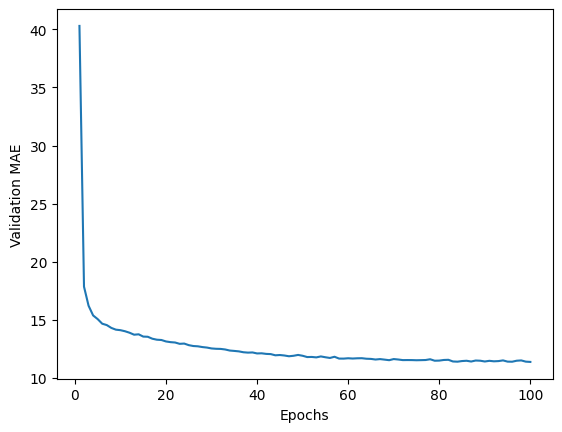

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

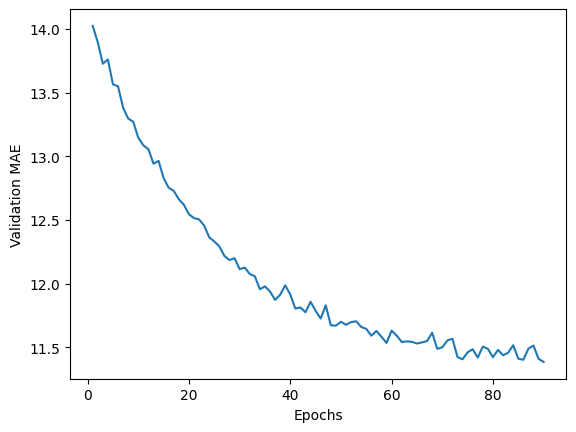

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(X_train, y_train,
          epochs=130, batch_size = 256, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

268/268 [==============================] - 1s 2ms/step - loss: 317.5362 - mae: 11.0097


In [ ]:
predictions = model.predict(X_test)
predictions[0]

268/268 [==============================] - 0s 1ms/step


array([89.7765], dtype=float32)

In [ ]:
# # sales_type, service_type dummy 변환 bool 형식
# df_final=pd.get_dummies(df)

In [ ]:
train['deposit+rent']

id
36293764     29.750000
36576214     31.750000
36533474     52.916667
36485939    127.500000
36485528     42.916667
               ...    
36557272     60.833333
36492163     71.666667
36504430     42.916667
36544670     55.833333
36386612     67.500000
Name: deposit+rent, Length: 34208, dtype: float64

In [ ]:
Y = train['deposit+rent']
X = train.drop(['deposit+rent'], axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data, target)

LinearRegression()

In [ ]:
print(lr.score(data, target))
print(lr.score(eval_data, eval_target))

0.6940771933873804
0.6813614402152186


#MINST 데이터 세트 & 데이터 로더 구성

In [ ]:
train_data = datasets.MNIST(
    root='data', # 데이터를 저장할 root 디렉토리
    train=True, #훈련용 데이터 설정
    download=True, #다운로드
    transform=ToTensor() # transform : 이미지 증강 기법지정 여기서는 단순하게 Torch TEnsfor로 변환   
)

test_data = datasets.MNIST(
    root='data', # 데이터를 저장할 root 디렉토리
    train=False, #훈련용 데이터 설정
    download=True, #다운로드
    transform=ToTensor() # transform : 이미지 증강 기법지정 여기서는 단순하게 Torch TEnsfor로 변환
)

100%|██████████| 9912422/9912422 [00:00<00:00, 263768453.92it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115147997.93it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 120567831.74it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20888737.68it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
import torch
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1, )).item()
  feature, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.imshow(feature.squeeze(), cmap='gray')

plt.show()

# PyTorch Modeling
- 파이토치는 대부분 서브 클래싱을 활용한 모델링을 수행합니다.
  - torch.nn.Module 클래스를 상속받아 만든다.
- 필수적으로 오버라이딩할 메소드는 __init__, 순전파를 담당하는 forward


In [ ]:
from torch import nn #딥러닝에 필요한 레이어 패키지

class NeuralNetwork(nn.Module):

  # 사용할 레이어 또는 블록을 정의하는 공간
  def __init__(self):
    super(NeuralNetwork, self).__init__()

    self.flatten = nn.Flatten()

    # 여러 레이어가 하나의 단위로 묶이는 블록을 만들기 위해서 sequential을 쓴다.
    self.linear_relu_stack = nn.Sequential(
        ## nn.Linear : Fully Connected 구조. Keras의 dense와 같다.
        nn.Linear(in_features=28*28, out_features=128),
        nn.ReLU(),
        nn.Dropout(0.2), # 과대적합 방지, 훈련시 마다 랜덤하게 20%의 가중치를 0으로 설정하여 사용하지 않는다.
        
        nn.Linear(128,10) # 출력층.softmax를 지정하지 않는다!
    )

  def forward(self, x):
    x = self.flatten(x)
    y = self.linear_relu_stack(x)

    return y

# 모델 생성
파이토치를 활용해 모델 객체를 만들고 나서 어떤 장치 환경에서 훈련하고 추론을 할지 결정해줘야한다.

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device  

'cuda'

cuda 가 출력되면 GPU 사용이 가능한 상태

In [ ]:
model = NeuralNetwork().to(device) # CPU에서 만들어진 모델을 GPU로 옮긴다.
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 또는 cuda()메소드를 활요할 수 있다.
model2 = NeuralNetwork().cuda()
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


# CNN 모델 구성

## Output Feature Map Size
- $i$ : 입력 feature의 개수
- $o$ : 출력 feature의 수 hight,width
- $k$ : kernel size
- $p$ : padding size
- $s$ : stride size

$$
o = \bigg(\frac{i+2p-k}{s}\bigg)+1
$$

실수 형태로 크기가 나오면 반드시 정수형태로 바꿔줍니다.

### 예시
- $i$ : 입력 feature의 개수 → 7
- $o$ : 출력 feature의 수 
- $k$ : kernel size → 3
- $p$ : padding size → 0
- $s$ : stride size → 1

$$
o=\bigg(\frac{7+2\times 0-3}{1}\bigg)+1=5
$$

# PyTorch  (C , H, W)

In [ ]:
class CustomConvNet(nn.Module):
  
  def __init__(self):
    super(CustomConvNet, self).__init__()
    
    # Feature Extraction
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
      nn.ReLU()
    )

    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 입력 특성 맵의 세로 가로 크기가 절반이 된다. -> 14 x 14

    self.conv_block2 = nn.Sequential(
      nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
      nn.ReLU()
    )

    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 7 x 7

    # FCL 구현
    self.classifier = nn.Sequential(
        nn.Linear(32*7*7, 512), nn.ReLU(),
        nn.Linear(512, 256), nn.ReLU(),
        nn.Linear(256, 10)
    )

  def forward(self, x):

    # Feature Extraction
    x = self.conv_block1(x)
    x = self.maxpool1(x)

    x = self.conv_block2(x)
    x = self.maxpool2(x)

    # FCL
    x = nn.Flatten()(x)
    y = self.classifier(x)

    return y

In [ ]:
cnn_model = CustomConvNet().to(device)
print(cnn_model)

CustomConvNet(
  (conv_block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier): Sequential(
    (0): Linear(in_features=1568, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


# 데이터 로더 생성성

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64, shuffle=False) # 성능만 볼 것이기 때문에

#하이퍼 파라미터 선정

In [ ]:
EPOCH =10
LEARNING_RATE =1e-3

In [ ]:
# Loss Function & Optimizer
loss_fn = nn.CrossEntropyLoss()  # sparse_categorical_crossentropy + categorical_crossentropy, softmax를 포함하고 있음.
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=LEARNING_RATE) # 모델에서 최적화할 파라미터를 넣어준다. 

# model.parameters() -> 가중치, 편향,CNN 입장에서는 필터, 최적화에 의해 갱신해아할 대상상

# 훈련, 테스트 루틴 정의

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)

  # 모델을 훈련모드로 설정 : 가중치와 편향이 업데이트가 가능한 상태 
  model.train() # 가중치, 편향 등을 갱신가능!

  for batch, (X, y) in enumerate(dataloader):
    # 현재 데이터(X, y )는 CPU에 존재하는 상태. 모델은 gpu에 있음
    X, y = X.to(device), y.to(device) # 모델의 위치와 데이터의 위치 맞춰야함

    # 예측 및 손실함수 확인
    pred = model(X) # pred : 마지막 출력층의 연산 결과
    loss = loss_fn(pred, y) # Loss가 등장

    # 미분값 구하기. 역전파를 수행해서 구하기로
    optimizer.zero_grad() #기존에 남아있던 기울기를 제거. 이전 배치의 기울기를 반영하지 않기 위함
    loss.backward() # 역전파
    optimizer.step() # 갱신(경사하강법ADAM 수행)

    # 배치가 100번 돌 때마다 화면에 출력
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"Train Loss : {loss:>7f} [ {current:>5d} / {size:>5d} ]")

# optimizer는 테스트에서 필요 없다.
def test_loop(dataloader,model, loss_fn):
  size = len(dataloader.dataset)
  test_loss, correct = 0, 0

  # 테스트할 때는 평가모드(추론모드)
  model.eval()

  # 추론 과정에서는 기울기(gradient)를 구하지 않는다.
  with torch.no_grad():
    for X,y in dataloader:
      # 추론 모드에서도 GPU는 활용해야하기 때문에 데이터를 gpu 환경으로 이동
      X, y = X.to(device), y.to(device)

      pred = model(X)
      test_loss += loss_fn(pred, y).item() # item() : 텐서 내에 있는 스칼라를 가져오기기
      correct += (pred.argmax(1) == y).type(torch.float).sum().item() # argmax(axis=1) 가장 높은 값이 있는 인덱스를 클래스로 삼을 것이다!

  num_batches = len(dataloader)

  # 배치별 loss 값의 평균 구하기
  test_loss /= num_batches

  # 전체 데이터의 정확도 구하기
  correct /= size

  print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg Loss : {test_loss:>8f}\n")


In [ ]:
epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}\n........................")
  train_loop(train_dataloader, cnn_model, loss_fn, optimizer)
  test_loop(test_dataloader, cnn_model, loss_fn)

print("Done!")

Epoch 1
........................
Train Loss : 2.303043 [     0 / 60000 ]
Train Loss : 0.070187 [  6400 / 60000 ]
Train Loss : 0.204810 [ 12800 / 60000 ]
Train Loss : 0.048122 [ 19200 / 60000 ]
Train Loss : 0.006255 [ 25600 / 60000 ]
Train Loss : 0.022014 [ 32000 / 60000 ]
Train Loss : 0.021884 [ 38400 / 60000 ]
Train Loss : 0.034051 [ 44800 / 60000 ]
Train Loss : 0.038805 [ 51200 / 60000 ]
Train Loss : 0.035183 [ 57600 / 60000 ]
Test Error : 
 Accuracy : 98.0%, Avg Loss : 0.064021

Epoch 2
........................
Train Loss : 0.005916 [     0 / 60000 ]
Train Loss : 0.010133 [  6400 / 60000 ]
Train Loss : 0.034894 [ 12800 / 60000 ]
Train Loss : 0.022840 [ 19200 / 60000 ]
Train Loss : 0.003207 [ 25600 / 60000 ]
Train Loss : 0.035767 [ 32000 / 60000 ]
Train Loss : 0.040805 [ 38400 / 60000 ]
Train Loss : 0.016411 [ 44800 / 60000 ]
Train Loss : 0.042586 [ 51200 / 60000 ]
Train Loss : 0.002623 [ 57600 / 60000 ]
Test Error : 
 Accuracy : 99.1%, Avg Loss : 0.028901

Epoch 3
..................

# 변수 선택 - 재학습

In [ ]:
# important_features=['X', 'Y', '_floor', 'app_apt', 'app_dandok', 'building_dasedae', 'building_total', 'culture_per_ppltn', 'elevator', 'emd_cd_2020', 'emd_cd_2022', 'gym_per_ppltn', 'manage_cost', 'medical_per_ppltn', 'options_cnt', 'ppltn_ageing_idx', 'ppltn_dnsty', 'service_type_new', 'size', 'size_m2', 'deposit+rent']

In [ ]:
# train2 = train[important_features]